In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import wget

In [5]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'

In [6]:
!python -m wget $url 


Saved under laptops (1).csv


In [54]:
laptops = pd.read_csv('laptops.csv')

In [55]:
laptops.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [56]:
laptops.isnull().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

In [57]:
laptops.columns = laptops.columns.str.lower().str.replace(' ', '_')

In [122]:
df = laptops[['ram', 'storage', 'screen', 'final_price']]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [59]:
sns.set_style(style='darkgrid')

1.6495877663192549


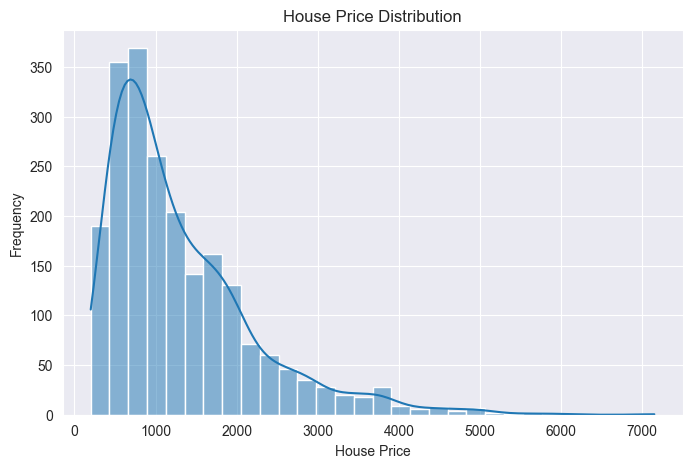

In [60]:
plt.figure(figsize=(8, 5))
sns.histplot(df['final_price'], bins=30, kde=True)
plt.title('House Price Distribution')
plt.xlabel('House Price')
plt.ylabel('Frequency')

skewness =df['final_price'].skew()
print(skewness)

### Question 1
There's one column with missing values. What is it?

In [61]:
print(f'Missing values:\n',df.isnull().sum())

Missing values:
 ram            0
storage        0
screen         4
final_price    0
dtype: int64


### Question 2
What's the median (50% percentile) for variable 'ram'?

In [62]:
median_ram = df['ram'].median()
print('The median (50% percentile) for variable ram = ', median_ram)

The median (50% percentile) for variable ram =  16.0


In [63]:
df.shape

(2160, 4)

Prepare and split the dataset </br>
Shuffle the dataset (the filtered one you created above), use seed 42. </br>
Split your data in train/val/test sets, with 60%/20%/20% distribution. </br>
Use the same code as in the lectures </br>

In [64]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [65]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [66]:
n_val, n_test, n_train

(432, 432, 1296)

In [67]:
n

2160

In [68]:
idx = np.arange(n)

In [69]:
np.random.seed(42)
np.random.shuffle(idx)

In [70]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [71]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [72]:
y_train = np.log1p(df_train['final_price'].values)
y_val = np.log1p(df_val['final_price'].values)
y_test = np.log1p(df_test['final_price'].values)

In [73]:
# del df_train['final price']
# del df_val['final price']
# del df_test['final price']

### Question 3
We need to deal with missing values for the column from Q1. </br>
We have two options: fill it with 0 or with the mean of this variable.</br>
Try both options. For each, train a linear regression model without regularization using the code from the lessons.</br>
For computing the mean, use the training only!</br>
Use the validation dataset to evaluate the models and compare the RMSE of each option.</br>
Round the RMSE scores to 2 decimal digits using round(score, 2)</br>
Which option gives better RMSE?</br>
Options:

With 0</br>
With mean</br>
Both are equally good

In [74]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [75]:
df_zero = df.fillna(0)

In [80]:
df_zero.isnull().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [85]:
df_mean = df.fillna(df['screen'].mean())

In [86]:
df_mean.isnull().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [91]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

#### With 0

In [110]:
df_base = ['ram', 'storage', 'screen', 'final_price']

X_train = df_train[df_base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [111]:
w0

6.303689704237895

In [112]:
w

array([-0.00103762,  0.00011921, -0.01393199,  0.00062561])

<Axes: ylabel='Count'>

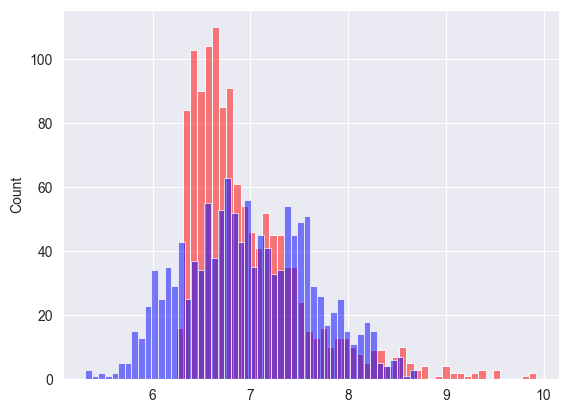

In [113]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [114]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [115]:
rmse(y_train, y_pred)

0.2391256423541011

#### With mean

In [116]:
df_base = ['ram', 'storage', 'screen', 'final_price']

X_train = df_train[df_base].fillna(df_mean).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [117]:
w0

6.347688704990784

In [118]:
w

array([-0.00096062,  0.00012141, -0.01695262,  0.00062541])

<Axes: ylabel='Count'>

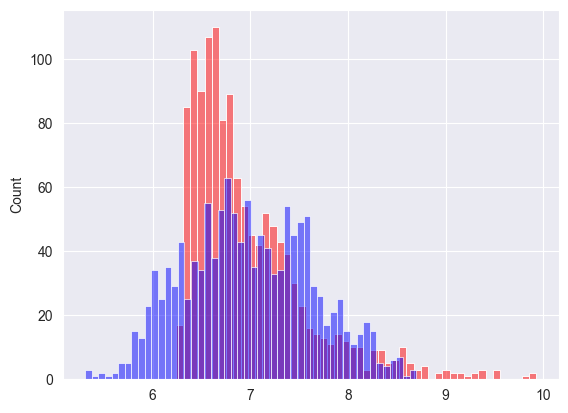

In [119]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [120]:
rmse(y_train, y_pred)

0.23909062963488115

In [129]:
round(rmse(y_train,y_pred),2)

0.24

### Validation with 0

In [130]:
def prepare_X(df):
    df_num = df[df_base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [131]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.24359663956861408

### Validation with mean

In [132]:
def prepare_X(df):
    df_num = df[df_base]
    df_num = df_num.fillna(df_mean)
    X = df_num.values
    return X

In [133]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.24346102979850195

### Question 4
Now let's train a regularized linear regression. </br>
For this question, fill the NAs with 0.</br>
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].</br>
Use RMSE to evaluate the model on the validation dataset.</br>
Round the RMSE scores to 2 decimal digits.</br>
Which r gives the best RMSE?</br>
If there are multiple options, select the smallest r.</br>

Options:

0</br>
0.01</br>
1</br>
10</br>
100</br>

In [125]:
df.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [126]:
df = df.fillna(value = 0)

In [127]:
df.isna().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [134]:
test_list = [0, 0.01, 0.1, 1, 5, 10, 100]

In [141]:
def train_linear_regression_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [148]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
# rmse(y_val, y_pred)
round(rmse(y_val, y_pred),2)

0.24


In [150]:
for r in test_list:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred),2)
    
    print(r, w0, score)

0 6.347688704990784 0.24
0.01 6.339423734530097 0.24
0.1 6.266000533456737 0.24
1 5.615937695047663 0.25
5 3.8471286702076157 0.31
10 2.7644358967778326 0.36
100 0.4765343065315838 0.5


### Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score. </br>
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]. </br>
For each seed, do the train/validation/test split with 60%/20%/20% distribution. </br>
Fill the missing values with 0 and train a model without regularization. </br>
For each seed, evaluate the model on the validation dataset and collect the RMSE scores. </br>
What's the standard deviation of all the scores? To compute the standard deviation, use np.std. </br>
Round the result to 3 decimal digits (round(std, 3)) </br>
What's the value of std? </br>

19.176 </br>
29.176 </br>
39.176 </br>
49.176 </br>

Testing with seed Values = [0,1,2,3,4,5,6,7,8,9]

In [252]:
df = laptops[['ram', 'storage', 'screen', 'final_price']]

In [253]:
df.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [236]:
# Seed Value 0
np.random.seed(9)
np.random.shuffle(idx)

In [237]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [238]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [239]:
y_train = np.log1p(df_train['final_price'].values)
y_val = np.log1p(df_val['final_price'].values)
y_test = np.log1p(df_test['final_price'].values)

In [240]:
df = df.fillna(value = 0)

In [241]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [242]:
df_base = ['ram', 'storage', 'screen', 'final_price']

X_train = df_train[df_base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [243]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [244]:
rmse(y_train, y_pred)

0.2359861235379957

In [245]:
seed_0 = 0.23354691735232097
seed_1 = 0.23813366289840238
seed_2 = 0.2362549437693836
seed_3 = 0.24276582792058468
seed_4 = 0.22676872312534196
seed_5 = 0.23755037566644402
seed_6 = 0.23320088197469216
seed_7 = 0.2396750585862992
seed_8 = 0.23286940957401936
seed_9 = 0.2359861235379957

In [262]:
rmse_scores = (seed_0 + seed_1 + seed_2 + seed_3 + seed_4 + seed_5 + seed_6 + seed_7 + seed_8 + seed_9)
rmse_scores

2.356751924405484

In [264]:
rmse_std = np.std(rmse_scores)
rmse_std

0.0